In [1]:

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import datetime

import psycopg2 as pg #open postgres

import matplotlib.pyplot as plt

# ________________________ Data wrangling _________________________

In [2]:
# »»»»»»»»»»»»»»»»» STOCKS ««««««««««««««««««««z

STOCKS={'amazon':'AMZN','apple':'AAPL','netflix':'NFLX','google':'GOOG','Accenture':'ACN',
       'alibaba':'BABA','Turtle Beach':'HEAR','Disney':'DIS',
       'LG Display':'LPL','microsoft':'MICS','sony':'SONY',
       'Cenovus Energy':'CVE','YPF':'YPF','SHELL':'SHEL','Petrobras':'PBR',
       'Coca-Cola':'KO','PespsiCo':'PEP','Unilever':'UL','Kimberly-Clark':'KMB',
       'Mondelez':'MDLZ'}

#STOCKS = {'amazon':'AMZN'}

# dir where parquete file will be created
stocks_dir = '/dataset/stocks_aux/'

#*****************************************************************

### ------------------------------------------- Check OLHCV data -------------------------------------------------

In [3]:
#----------------------------  Functions -------------------

In [4]:
def get_dupicated (df):
    # Create an empty Series to store the counts of duplicates
    duplicates_counts = pd.Series()
    
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Count duplicates in the column
        duplicates_count = df[column].duplicated().sum()
        
        # Store the count in the Series with column name as index
        duplicates_counts[column] = duplicates_count
    return duplicates_counts

In [5]:
#----------------------------------------------------------------------------

In [6]:
# -------------------------- ronnect to db already running with docker -----------------------------------------
engine = pg.connect("dbname='etl' user='marcos' host='127.0.0.1' port='5432' password='m0rc05'")

In [7]:
# -------------------------------------- read OHLCV data -------------------------------------------------------
df_training = pd.read_sql('SELECT * FROM tickets order by datetime', con=engine) #order table

/tmp/ipykernel_4413/1005606692.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_training = pd.read_sql('SELECT * FROM tickets order by datetime', con=engine) #order table


In [8]:
df_training.shape

(17736, 15)

In [9]:
#Sort for datetime
df_training.sort_values(by=['datetime'],inplace=True) #just in case
#remove hour from 00:00 t0 3:00 and 20:00 to 00:00
#df_training=df_training.dropna(subset=['open'])
df_training.shape

(17736, 15)

In [10]:
df_training.head(10)

,ticker,datetime,date,hour,holidays,n_weekday,n_hour,open,high,low,close,adj_close,volume,dividends,stock_splits
0,AAPL,2022-04-06 04:00:00,2022-04-06,04:00:00,0,2,4,174.910000,175.000000,173.410000,173.720000,173.720000,0.0,0.0,0.0
1,AAPL,2022-04-06 05:00:00,2022-04-06,05:00:00,0,2,5,173.720000,174.100000,173.660000,173.800000,173.800000,0.0,0.0,0.0
2,AAPL,2022-04-06 06:00:00,2022-04-06,06:00:00,0,2,6,173.810000,173.860000,173.210000,173.250000,173.250000,0.0,0.0,0.0
3,AAPL,2022-04-06 07:00:00,2022-04-06,07:00:00,0,2,7,173.330000,173.350000,172.500000,172.680000,172.680000,0.0,0.0,0.0
4,AAPL,2022-04-06 08:00:00,2022-04-06,08:00:00,0,2,8,172.690000,175.230000,172.000000,172.620000,172.620000,0.0,0.0,0.0
5,AAPL,2022-04-06 09:00:00,2022-04-06,09:00:00,0,2,9,172.360001,173.139999,171.020004,171.130005,171.130005,21718850.0,0.0,0.0
6,AAPL,2022-04-06 10:00:00,2022-04-06,10:00:00,0,2,10,171.130005,171.580002,170.130005,170.835007,170.835007,11354344.0,0.0,0.0
7,AAPL,2022-04-06 11:00:00,2022-04-06,11:00:00,0,2,11,170.839996,171.740005,170.490005,170.975006,170.975006,7839538.0,0.0,0.0
8,AAPL,2022-04-06 12:00:00,2022-04-06,12:00:00,0,2,12,170.970001,171.710007,170.871506,171.710007,171.710007,5695053.0,0.0,0.0
9,AAPL,2022-04-06 13:00:00,2022-04-06,13:00:00,0,2,13,171.720001,173.410004,170.929993,171.380005,171.380005,11187310.0,0.0,0.0


In [11]:
df_training.describe()

,datetime,holidays,n_weekday,n_hour,open,high,low,close,adj_close,volume,dividends,stock_splits
count,17736,17736.000000,17736.000000,17736.000000,7946.000000,7946.000000,7946.000000,7946.000000,7946.000000,7.946000e+03,7946.000000,7946.0
mean,2023-04-10 16:16:06.982408704,0.027064,2.994587,11.500000,165.271721,166.116217,164.371186,165.275368,165.275368,3.735755e+06,0.000237,0.0
min,2022-04-06 04:00:00,0.000000,0.000000,0.000000,124.578003,124.940002,117.358200,124.570000,124.570000,0.000000e+00,0.000000,0.0
25%,2022-10-07 21:45:00,0.000000,1.000000,6.000000,149.328530,150.098485,148.482500,149.330000,149.330000,0.000000e+00,0.000000,0.0
50%,2023-04-10 15:30:00,0.000000,3.000000,11.500000,168.005000,168.766151,166.830002,167.990000,167.990000,0.000000e+00,0.000000,0.0
75%,2023-10-12 09:15:00,0.000000,5.000000,17.000000,179.800000,180.839996,178.690002,179.800003,179.800003,6.283160e+06,0.000000,0.0
max,2024-04-16 19:00:00,1.000000,6.000000,23.000000,198.800003,219.339500,198.220000,198.789993,198.789993,5.708336e+07,0.240000,0.0
std,NaN,0.162273,1.998808,6.917167,18.390125,18.416853,18.398691,18.386072,18.386072,5.444903e+06,0.007455,0.0


In [12]:
#---------------------------- check for Nulls & NAN -------------------
l1=list(df_training.columns)

In [13]:
serie_1=df_training[l1].isna().sum()
serie_2=df_training[l1].isnull().sum()
serie_3=get_dupicated (df_training)
pd.concat( [serie_1, serie_2,serie_3], join='outer',keys = ['Nan','Null','Duplicated'], axis=1)

,Nan,Null,Duplicated
ticker,0,0,17735
datetime,0,0,0
date,0,0,16996
hour,0,0,17712
holidays,0,0,17734
n_weekday,0,0,17729
n_hour,0,0,17712
open,9790,9790,11565
high,9790,9790,11734
low,9790,9790,11686


In [14]:
#check if index is sorted. if yes ==Ture
df_training.index.is_monotonic_increasing

True

In [15]:
#check if index is sorted. if yes ==Ture
df_training.datetime.is_monotonic_increasing

True

In [16]:
#check if holidays is set
df_training[df_training.holidays==1]['holidays'].count()

480

In [17]:
df_training[df_training.open.isna()]

,ticker,datetime,date,hour,holidays,n_weekday,n_hour,open,high,low,close,adj_close,volume,dividends,stock_splits
16,AAPL,2022-04-06 20:00:00,2022-04-06,20:00:00,0,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,AAPL,2022-04-06 21:00:00,2022-04-06,21:00:00,0,2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,AAPL,2022-04-06 22:00:00,2022-04-06,22:00:00,0,2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,AAPL,2022-04-06 23:00:00,2022-04-06,23:00:00,0,2,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,AAPL,2022-04-07 00:00:00,2022-04-07,00:00:00,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17715,AAPL,2024-04-15 23:00:00,2024-04-15,23:00:00,0,0,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17716,AAPL,2024-04-16 00:00:00,2024-04-16,00:00:00,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17717,AAPL,2024-04-16 01:00:00,2024-04-16,01:00:00,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17718,AAPL,2024-04-16 02:00:00,2024-04-16,02:00:00,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_training[df_training.date==datetime.date(2022,5,7)]

,ticker,datetime,date,hour,holidays,n_weekday,n_hour,open,high,low,close,adj_close,volume,dividends,stock_splits
740,AAPL,2022-05-07 00:00:00,2022-05-07,00:00:00,0,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,AAPL,2022-05-07 01:00:00,2022-05-07,01:00:00,0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,AAPL,2022-05-07 02:00:00,2022-05-07,02:00:00,0,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,AAPL,2022-05-07 03:00:00,2022-05-07,03:00:00,0,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,AAPL,2022-05-07 04:00:00,2022-05-07,04:00:00,0,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,AAPL,2022-05-07 05:00:00,2022-05-07,05:00:00,0,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,AAPL,2022-05-07 06:00:00,2022-05-07,06:00:00,0,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,AAPL,2022-05-07 07:00:00,2022-05-07,07:00:00,0,5,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,AAPL,2022-05-07 08:00:00,2022-05-07,08:00:00,0,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749,AAPL,2022-05-07 09:00:00,2022-05-07,09:00:00,0,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_training.shape

(17736, 15)

### ------------------------------------------- Check sentiment data -------------------------------------------------

In [20]:
# --------------------------------------open sentiment -------------------------------------------------------
df_sentiment = pd.read_sql('SELECT * FROM sentiment order by datetime', con=engine)

/tmp/ipykernel_4413/4068935949.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sentiment = pd.read_sql('SELECT * FROM sentiment order by datetime', con=engine)


In [21]:
df_sentiment.shape

(16883, 11)

In [22]:
df_sentiment.describe()

,key_id,datetime,overall_sentiment_score,relevance_score,ticker_sentiment_score
count,16883.000000,16883,16883.000000,16883.000000,16883.000000
mean,8441.000000,2023-03-28 22:23:47.951726592,0.105603,0.305964,0.087153
min,0.000000,2022-03-01 08:00:00,-0.809507,0.004060,-0.991259
25%,4220.500000,2022-09-20 11:35:09.500000,0.007158,0.109780,0.000000
50%,8441.000000,2023-03-28 09:40:39,0.121953,0.198819,0.072418
75%,12661.500000,2023-10-05 15:46:37,0.217303,0.456884,0.198024
max,16882.000000,2024-04-16 21:45:20,0.927954,1.000000,0.994820
std,4873.846633,NaN,0.160058,0.259604,0.207506


In [23]:
#---------------------------- check for Nulls & NAN -------------------
l1=list(df_sentiment.columns)

In [24]:
serie_1=df_sentiment[l1].isna().sum()
serie_2=df_sentiment[l1].isnull().sum()
serie_3=get_dupicated(df_sentiment)
pd.concat( [serie_1, serie_2,serie_3], join='outer',keys = ['Nan','Null','Duplicated'], axis=1)

,Nan,Null,Duplicated
key_id,0,0,0
ticker,0,0,16882
title,0,0,1289
url,0,0,64
summary,0,0,1081
source,0,0,16847
time_published,0,0,418
datetime,0,0,418
overall_sentiment_score,0,0,634
relevance_score,0,0,10321


In [25]:
df_sentiment

,key_id,ticker,title,url,summary,source,time_published,datetime,overall_sentiment_score,relevance_score,ticker_sentiment_score
0,0.0,AAPL,"US stocks fall, oil tops $105 as Ukraine crisi...",https://www.aljazeera.com/economy/2022/3/1/us-...,A surge in oil sent shivers through risky asse...,Al Jareeza,20220301T080000,2022-03-01 08:00:00,-0.277460,0.062711,-0.247750
1,2.0,AAPL,Apple halts product sales in Russia after Ukra...,https://www.scmp.com/tech/big-tech/article/316...,Apple Inc halted sales of the iPhone and its o...,South China Morning Post,20220302T020013,2022-03-02 02:00:13,-0.495467,0.078175,-0.477815
2,1.0,AAPL,Russia says its economy is taking 'serious blo...,https://www.cnn.com/2022/03/02/business/russia...,London/Moscow ( CNN Business ) The Russian...,CNN,20220302T080000,2022-03-02 08:00:00,-0.469431,0.195245,-0.420224
3,3.0,AAPL,"Rich Russians turn to luxury jewellery, watche...",https://www.aljazeera.com/economy/2022/3/2/ric...,With sanctions on Russia sending the ruble plu...,Al Jareeza,20220302T080000,2022-03-02 08:00:00,-0.118323,0.051474,0.101278
4,6.0,AAPL,Why many businesses are getting tougher on Rus...,https://www.cnn.com/2022/03/03/business/busine...,Why many businesses are getting tougher on Rus...,CNN,20220303T080000,2022-03-03 08:00:00,-0.321990,0.164618,-0.249584
...,...,...,...,...,...,...,...,...,...,...,...
16878,16837.0,AAPL,Brightcove ( BCOV ) Unveils New Player Platf...,https://www.zacks.com/stock/news/2256268/brigh...,Brightcove (BCOV) launches new player platform...,Zacks Commentary,20240416T161400,2024-04-16 16:14:00,0.357922,0.570165,0.345585
16879,16838.0,AAPL,Apple Stock Drops As Growth Outlook Called Ane...,https://www.investors.com/news/technology/appl...,Apple stock fell Tuesday after a Wall Street f...,Investors Business Daily,20240416T183900,2024-04-16 18:39:00,-0.075573,0.842959,-0.134847
16880,16839.0,AAPL,"Three Stocks: Apple, Rivian, and Live Nation",https://moneymorning.com/2024/04/16/three-stoc...,Apple ( AAPL ) shares are bucking today's mark...,Money Morning,20240416T184138,2024-04-16 18:41:38,-0.122380,0.272788,0.030768
16881,16840.0,AAPL,Author Ethan Mollick on 4 Rules for Using AI,https://www.fool.com/investing/2024/04/16/auth...,We've also got a look at Why Disney and Nelson...,Motley Fool,20240416T203839,2024-04-16 20:38:39,0.130026,0.005671,0.060385


In [26]:
#--------remove same duplicated articles. Sentiment score in both cases is the same.--------------------
df_sentiment.drop_duplicates(inplace=True) #By default, it removes duplicate rows based on all columns.
#I am selecting all articles duplicated
df_sentiment.drop_duplicates(subset=['title'],inplace=True)

In [27]:
df_sentiment.shape

(15594, 11)

In [28]:
df_sentiment[df_sentiment.title.duplicated(keep=False)]

,key_id,ticker,title,url,summary,source,time_published,datetime,overall_sentiment_score,relevance_score,ticker_sentiment_score


In [29]:
#drop duplicated info in datetime. I have done this because is the easiest way
df_sentiment.drop_duplicates(subset=['datetime'],inplace=True)

In [30]:
df_sentiment.shape

(15402, 11)

### -------------------  Sentiment analisys  ------------------

In [31]:
#-------------------------- Check news sources ----------------------------------------------

In [32]:
aux_df=df_sentiment.copy()
#aux_df=aux_df[aux_df.relevance_score>=0.5] #select those news which are bigger than 0.5 of relevance score

In [33]:
aux_df['date']=aux_df['datetime'].dt.date

In [34]:
aux_df=aux_df.groupby( ['date','source']).size().reset_index(name='Count')

In [35]:
aux_2_df=aux_df.groupby('source')['Count'].sum().sort_values(ascending=False).reset_index(name='Total')

In [36]:
aux_2_df['pareto'] = 100 *aux_2_df.Total.cumsum() / aux_2_df.Total.sum()

In [37]:
aux_2_df

,source,Total,pareto
0,Benzinga,5433,35.274640
1,Motley Fool,2496,51.480327
2,Investors Business Daily,1509,61.277756
3,Zacks Commentary,1480,70.886898
4,MarketWatch,1231,78.879366
5,The Street,499,82.119205
6,Business Standard,300,84.067004
7,Reuters,269,85.813531
8,The Financial Express,259,87.495131
9,Forbes,208,88.845604


In [38]:
l1=aux_2_df.source.to_list()

(0.0, 110.0)

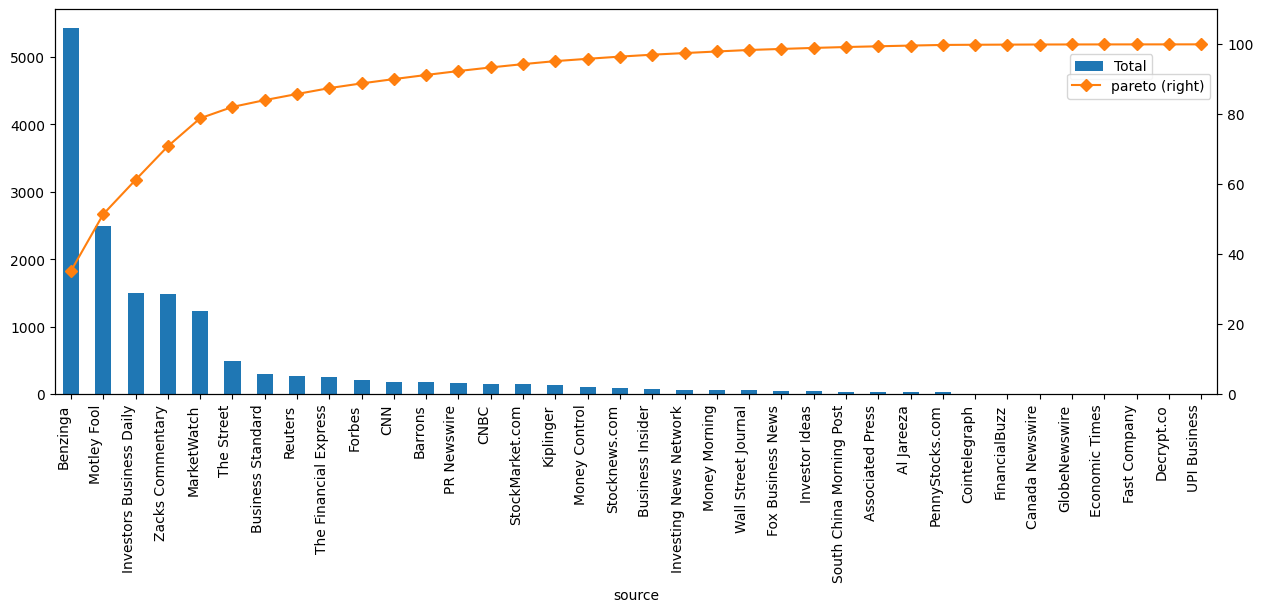

In [39]:
fig, axes = plt.subplots(figsize=(15,5))
ax1 = aux_2_df.plot(x='source', y='Total',  kind='bar', ax=axes)
ax2 = aux_2_df.plot(x='source',y='pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax1.legend(loc="lower right", bbox_to_anchor=(0.95,0.8))
ax2.legend(loc="lower right", bbox_to_anchor=(1,0.75))
ax1.set_xticklabels(aux_2_df.source, rotation=90, ha='right')
ax2.set_ylim([0,110])

In [40]:
#Keep those news sources which are more than 85% of total
aux_2_df[aux_2_df.pareto<=90]

,source,Total,pareto
0,Benzinga,5433,35.274640
1,Motley Fool,2496,51.480327
2,Investors Business Daily,1509,61.277756
3,Zacks Commentary,1480,70.886898
4,MarketWatch,1231,78.879366
5,The Street,499,82.119205
6,Business Standard,300,84.067004
7,Reuters,269,85.813531
8,The Financial Express,259,87.495131
9,Forbes,208,88.845604


In [41]:
news_list=aux_2_df[aux_2_df.pareto<=90]['source'].to_list()

In [42]:
df_sentiment=df_sentiment[df_sentiment['source'].isin(news_list)]

In [43]:
df_sentiment.shape

(13684, 11)

In [44]:
# aux_3_df=pd.pivot_table(aux_df,index=["date"],values=["Count"], columns=["source"],aggfunc="sum",margins=True,margins_name='Grand Total')
# aux_3_df=aux_3_df.droplevel(0,axis=1)
# aux_3_df.reset_index(inplace=True)
# aux_3_df=aux_3_df[['date']+l1]
# #aux_3_df.drop(652,inplace=True)

In [45]:
#-------------------------- Check hour ----------------------------------------------

In [46]:
aux_df=df_sentiment.copy()

In [47]:
#aux_df=aux_df[aux_df.relevance_score>=0.5] #select those news which are bigger than 0.5 of relevance score
aux_df.shape

(13684, 11)

In [48]:
aux_df['date']=aux_df['datetime'].dt.time
#aux_df['date']=aux_df['datetime'].dt.date

In [49]:
#ATTENTION For a pd.Series with datetime.time object
aux_df["date"]=aux_df["date"].apply(lambda x: x.replace(minute=0, second=0))

In [50]:
aux_df=aux_df.groupby(aux_df['date']).size().reset_index(name='Count')

In [51]:
aux_df.Count.sum()

13684

In [52]:
aux_df

,date,Count
0,00:00:00,108
1,01:00:00,177
2,02:00:00,195
3,03:00:00,178
4,04:00:00,181
5,05:00:00,170
6,06:00:00,188
7,07:00:00,195
8,08:00:00,310
9,09:00:00,825


In [53]:
aux_df["date"]=aux_df["date"].apply(lambda x: str(x)[0:2])

In [54]:
aux_df.describe()

,Count
count,24.000000
mean,570.166667
std,409.652097
min,108.000000
25%,186.250000
50%,525.000000
75%,884.750000
max,1319.000000


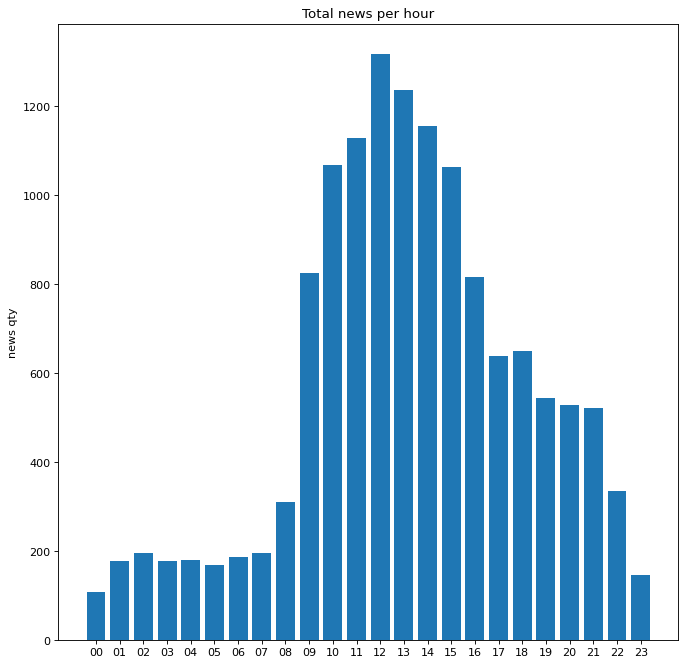

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)

date = aux_df['date'].to_list()
counts = aux_df['Count'].to_list()


ax.bar(date, counts)

ax.set_ylabel('news qty')

ax.set_title('Total news per hour')

plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'float'

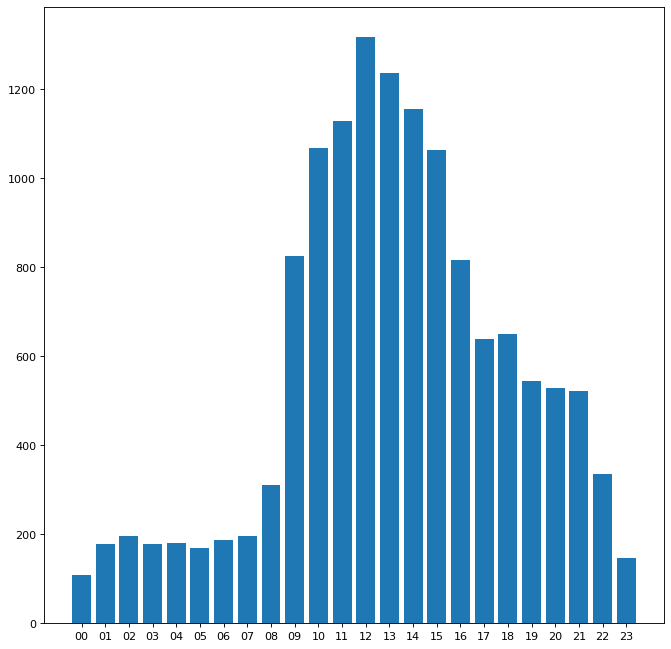

In [56]:

# example data
mu = 570.166667  # mean of distribution
sigma = 409.652097  # standard deviation of distribution
date = aux_df['date'].to_list()
counts = aux_df['Count'].to_list()


fig, ax = plt.subplots(figsize=(10, 10), dpi=80)

# the histogram of the data
ax.bar(date, counts)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
      np.exp(-0.5 * (1 / sigma * (counts - mu))**2))

ax.plot(date, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [57]:
aux_df=aux_df.sort_values(by='Count',ascending=False)

In [58]:
aux_df['Count']

12    1319
13    1237
14    1157
11    1130
10    1069
15    1064
9      825
16     816
18     650
17     638
19     544
20     528
21     522
22     336
8      310
7      195
2      195
6      188
4      181
3      178
1      177
5      170
23     147
0      108
Name: Count, dtype: int64

In [ ]:
aux_df['pareto'] = 100 *aux_df.Count.cumsum() / aux_df.Count.sum()

In [63]:
aux_df['pareto'].sort_values()

12      9.638994
13     18.678749
14     27.133879
11     35.391698
10     43.203742
15     50.979246
9      57.008185
16     62.971353
18     67.721426
17     72.383806
19     76.359252
20     80.217773
21     84.032447
22     86.487869
8      88.753289
7      90.178310
2      91.603332
6      92.977200
4      94.299912
3      95.600702
1      96.894183
5      98.136510
23     99.210757
0     100.000000
Name: pareto, dtype: float64

In [64]:
aux_df.reset_index(inplace=True)

(0.0, 110.0)

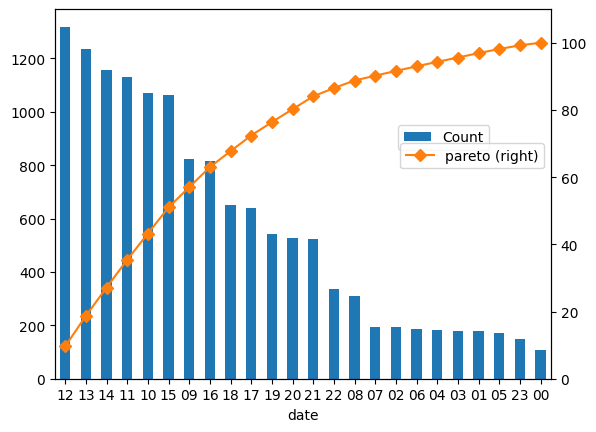

In [74]:
fig, axes = plt.subplots()
ax1 = aux_df.plot(x='date', y='Count',  kind='bar', ax=axes)
ax2 = aux_df.plot(x='date',y='pareto', marker='D', color="C1", kind='line', ax=axes, secondary_y=True)
ax1.legend(loc="lower right", bbox_to_anchor=(0.89,0.6))
ax2.legend(loc="lower right", bbox_to_anchor=(1.0,0.55))
ax2.set_ylim([0,110])

In [88]:
aux_df

,index,date,Count,pareto
0,0,00,108,0.789243
1,1,01,177,2.082724
2,2,02,195,3.507746
3,3,03,178,4.808536
4,4,04,181,6.131248
5,5,05,170,7.373575
6,6,06,188,8.747442
7,7,07,195,10.172464
8,8,08,310,12.437884
9,9,09,825,18.466823


Index(['key_id', 'ticker', 'title', 'url', 'summary', 'source',
       'time_published', 'datetime', 'overall_sentiment_score',
       'relevance_score', 'ticker_sentiment_score'],
      dtype='object')

In [ ]:
# aux_3_df['Others']=aux_3_df.index.apply(lambda x: aux_3_df.loc[x,4:].mean())

In [ ]:
# aux_3_df.index_values()

In [ ]:
# for i in range(len(aux_3_df.date)):
#     print(aux_3_df.iloc[i,4:].mean())

In [ ]:
#aux_2_df.sum().sort_values(ascending=False),np.sum(aux_2_df.sum().sort_values(ascending=False))

In [ ]:
# table = pd.pivot_table(aux_df, values='Count', index=['date', 'source'], aggfunc="sum", fill_value=0)

In [ ]:
#aux_df.pivot(values=l1,index=['date'], aggfunc=np.sum, margins=True)

In [ ]:
# pivot_operation=pd.pivot_table(aux_df,index=["date"],values=["Count"], columns=["source"],aggfunc="sum",margins=True,margins_name='Grand Total')
# pivot_operation.columns.nlevels

In [ ]:
# pivot_operation.columns

In [ ]:
# pivot_operation=pivot_operation.droplevel(0,axis=1)

In [89]:
pivot_operation.reset_index(inplace=True)

NameError: name 'pivot_operation' is not defined

In [ ]:
#pivot_operation=pivot_operation.droplevel(1,axis=1)

In [87]:
pivot_operation


NameError: name 'pivot_operation' is not defined

In [90]:
pivot_operation=pivot_operation[['date','Grand Total']]

NameError: name 'pivot_operation' is not defined

In [91]:
pivot_operation.drop(652,inplace=True)

NameError: name 'pivot_operation' is not defined

In [92]:
pivot_operation

NameError: name 'pivot_operation' is not defined

In [93]:
pivot_operation=pivot_operation[pivot_operation['date']>=datetime.date(2024,2,1)]

NameError: name 'pivot_operation' is not defined

In [94]:
date = pivot_operation['date'].apply(lambda x: str(x)).to_list()
counts = pivot_operation['Grand Total'].to_list()

NameError: name 'pivot_operation' is not defined

In [95]:
len(date)

24

In [96]:
len(counts)

24

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=80)


ax.bar(date, counts)

ax.set_ylabel('news qty')

ax.legend(title='News per day')

plt.show()

#### --------------- Create variables with news sources ---------------------------

In [ ]:
#Create pivot tables where index in datetime and columns are the news sources.
#For relevant score and ticker_sentiment_score

In [75]:
df_relevance_scr= df_sentiment.pivot(index="datetime", columns="source", values="relevance_score")

In [76]:
df_ticker_sent_scr= df_sentiment.pivot(index="datetime", columns="source", values="ticker_sentiment_score")

In [77]:
#reset index in order to have datetime as column

In [78]:
df_relevance_scr=df_relevance_scr.reset_index()
df_ticker_sent_scr=df_ticker_sent_scr.reset_index()

In [79]:
#read the top 20 sources news. Further investigation about this.

In [80]:
list(df_sentiment.source.value_counts(normalize=True).index)[0:20]

['Benzinga',
 'Motley Fool',
 'Investors Business Daily',
 'Zacks Commentary',
 'MarketWatch',
 'The Street',
 'Business Standard',
 'Reuters',
 'The Financial Express',
 'Forbes']

In [81]:
l_top_sources=['datetime']+list(df_sentiment.source.value_counts(normalize=True).index)[0:20]

In [82]:
#order columns based on list of top 20 news sources
df_relevance_scr=df_relevance_scr[l_top_sources]

In [83]:
df_ticker_sent_scr=df_ticker_sent_scr[l_top_sources]

In [84]:
#Rename columns in order to be easiest to work
len_sources=len(l_top_sources)-1
for i in range(len_sources):
    df_relevance_scr.rename(columns={l_top_sources[i+1]:'source'+str(len_sources-i)},inplace=True)
    df_ticker_sent_scr.rename(columns={l_top_sources[i+1]:'source'+str(len_sources-i)},inplace=True)

In [85]:
df_relevance_scr

source,datetime,source10,source9,source8,source7,source6,source5,source4,source3,source2,source1
0,2022-03-03 17:25:17,NaN,0.008278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-04 08:00:00,NaN,NaN,0.068797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-04 13:30:04,NaN,NaN,NaN,0.058231,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-04 13:50:06,NaN,NaN,NaN,0.304774,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-04 15:50:00,NaN,NaN,NaN,0.136966,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13679,2024-04-16 15:30:07,0.0699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13680,2024-04-16 16:14:00,NaN,NaN,NaN,0.570165,NaN,NaN,NaN,NaN,NaN,NaN
13681,2024-04-16 18:39:00,NaN,NaN,0.842959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13682,2024-04-16 20:38:39,NaN,0.005671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#remove nan with neutral = 0
df_relevance_scr.fillna(0,inplace=True)

In [87]:
#remove nan with neutral = 0
df_ticker_sent_scr.fillna(0,inplace=True)

In [88]:
#I am going to use only hours, so minutes will be reset
df_relevance_scr['datetime'] = pd.to_datetime(df_relevance_scr['datetime'])
# Reset minutes to 00
df_relevance_scr['datetime'] = df_relevance_scr['datetime'].dt.floor('H')
df_relevance_scr.shape

(13684, 11)

In [89]:
#I am going to use only hours, so minutes will be reset
df_ticker_sent_scr['datetime'] = pd.to_datetime(df_relevance_scr['datetime'])
# Reset minutes to 00
df_ticker_sent_scr['datetime'] = df_relevance_scr['datetime'].dt.floor('H')
df_ticker_sent_scr.shape

(13684, 11)

In [90]:
df_relevance_scr

source,datetime,source10,source9,source8,source7,source6,source5,source4,source3,source2,source1
0,2022-03-03 17:00:00,0.0000,0.008278,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-03-04 08:00:00,0.0000,0.000000,0.068797,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-03-04 13:00:00,0.0000,0.000000,0.000000,0.058231,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-03-04 13:00:00,0.0000,0.000000,0.000000,0.304774,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-03-04 15:00:00,0.0000,0.000000,0.000000,0.136966,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13679,2024-04-16 15:00:00,0.0699,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13680,2024-04-16 16:00:00,0.0000,0.000000,0.000000,0.570165,0.0,0.0,0.0,0.0,0.0,0.0
13681,2024-04-16 18:00:00,0.0000,0.000000,0.842959,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
13682,2024-04-16 20:00:00,0.0000,0.005671,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df_relevance_scr[df_relevance_scr.datetime.duplicated(keep=False)]

source,datetime,source10,source9,source8,source7,source6,source5,source4,source3,source2,source1
2,2022-03-04 13:00:00,0.000000,0.00000,0.00000,0.058231,0.0,0.00000,0.0,0.0,0.0,0.0
3,2022-03-04 13:00:00,0.000000,0.00000,0.00000,0.304774,0.0,0.00000,0.0,0.0,0.0,0.0
11,2022-03-07 10:00:00,0.505382,0.00000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
12,2022-03-07 10:00:00,0.000000,0.00000,0.00000,0.000000,0.0,0.19406,0.0,0.0,0.0,0.0
13,2022-03-07 12:00:00,0.000000,0.04456,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13674,2024-04-16 12:00:00,0.000000,0.00000,0.23281,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
13675,2024-04-16 12:00:00,0.767792,0.00000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
13676,2024-04-16 12:00:00,0.672712,0.00000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
13677,2024-04-16 13:00:00,0.044222,0.00000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [92]:
# Group by datetime and calculate mean
df_relevance_scr=df_relevance_scr.groupby('datetime').mean().reset_index()
df_relevance_scr.shape

(7177, 11)

In [93]:
df_ticker_sent_scr=df_ticker_sent_scr.groupby('datetime').mean().reset_index()
df_ticker_sent_scr.shape

(7177, 11)

In [94]:
#---------------------------------------------------- Merge tables ------------------------
#Join df_relevance_score with ticker_sentiment_score
df_relevance_scr=df_relevance_scr.merge(df_ticker_sent_scr, how='left', on='datetime')

In [95]:
df_relevance_scr.shape

(7177, 21)

In [96]:
#---------------------------- check for Nulls & NAN _ relevance_score -------------------
l1=list(df_relevance_scr.columns)
serie_1=df_relevance_scr[l1].isna().sum()
serie_2=df_relevance_scr[l1].isnull().sum()
serie_3=get_dupicated(df_relevance_scr)
pd.concat( [serie_1, serie_2,serie_3], join='outer',keys = ['Nan','Null','Duplicated'], axis=1)

,Nan,Null,Duplicated
datetime,0,0,0
source10_x,0,0,3786
source9_x,0,0,5267
source8_x,0,0,5884
source7_x,0,0,5993
source6_x,0,0,6104
source5_x,0,0,6717
source4_x,0,0,6901
source3_x,0,0,6924
source2_x,0,0,6932


#### --------------------------------------------------------------------------------

### ---------------------------------------------------- Merge tables -------------------------------

In [97]:

#Now, this is the final merging between OHLCV data and sentiment data.
#It will be left because df_training has all datetimes
df_training=df_training.merge(df_relevance_scr, how='left', on='datetime')

In [98]:
df_training.shape

(17736, 35)

In [99]:
#sort date
df_training.sort_values(by=['datetime'],inplace=True)

In [100]:
#---------------------------- check for Nulls & NAN _ relevance_score -------------------
l1=list(df_training.columns)
serie_1=df_training[l1].isna().sum()
serie_2=df_training[l1].isnull().sum()
serie_3=get_dupicated(df_training)
pd.concat( [serie_1, serie_2,serie_3], join='outer',keys = ['Nan','Null','Duplicated'], axis=1)

,Nan,Null,Duplicated
ticker,0,0,17735
datetime,0,0,0
date,0,0,16996
hour,0,0,17712
holidays,0,0,17734
n_weekday,0,0,17729
n_hour,0,0,17712
open,9790,9790,11565
high,9790,9790,11734
low,9790,9790,11686


In [101]:
df_training[df_training['open'].isna()].shape

(9790, 35)

In [102]:
#---------- Remove NAN in OHLCV data with previous figures --------------------------------------------------
#----------this method... propagate[s] last valid observation forward to next valid---------------------------
df_training[['open','high','low','close','adj_close','volume','dividends']]=df_training[['open','high','low','close','adj_close','volume','dividends']].fillna(method='ffill')

/tmp/ipykernel_4413/744797809.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_training[['open','high','low','close','adj_close','volume','dividends']]=df_training[['open','high','low','close','adj_close','volume','dividends']].fillna(method='ffill')


In [103]:
#remove nan with neutral = 0
df_training.fillna(0,inplace=True)

In [104]:
df_training[df_training.datetime.duplicated(keep=False)]

,ticker,datetime,date,hour,holidays,n_weekday,n_hour,open,high,low,...,source10_y,source9_y,source8_y,source7_y,source6_y,source5_y,source4_y,source3_y,source2_y,source1_y


In [105]:
#---------------------------- check for Nulls & NAN _ relevance_score -------------------
l1=list(df_training.columns)
serie_1=df_training[l1].isna().sum()
serie_2=df_training[l1].isnull().sum()
serie_3=get_dupicated(df_training)
pd.concat( [serie_1, serie_2,serie_3], join='outer',keys = ['Nan','Null','Duplicated'], axis=1)

,Nan,Null,Duplicated
ticker,0,0,17735
datetime,0,0,0
date,0,0,16996
hour,0,0,17712
holidays,0,0,17734
n_weekday,0,0,17729
n_hour,0,0,17712
open,0,0,11566
high,0,0,11735
low,0,0,11687


In [ ]:
df_training.head(30)

In [ ]:
df_training.shape

In [ ]:
df_training=df_training[(df_training.n_weekday>=0)&(df_training.n_weekday<5)]
df_training=df_training[(df_training.n_hour>=7)&(df_training.n_hour<20)] #due to hour graphic
df_training=df_training[(df_training.holidays!=1)]

In [ ]:
df_training.shape

In [ ]:
df_training

In [ ]:
df_training.columns

In [ ]:
l1=['source10_x', 'source9_x', 'source8_x', 'source7_x','source6_x', 'source5_x', 'source4_x', 'source3_x', 
    'source2_x','source1_x', 'source10_y', 'source9_y', 'source8_y', 'source7_y','source6_y', 'source5_y', 
    'source4_y', 'source3_y', 'source2_y','source1_y']

In [ ]:
for i in l1:
    total=df_training[df_training[i]==0][i].count()
    news=df_training[df_training[i]!=0][i].count()
    print(i, news,total,(news/total)*100)

In [ ]:
l2=['ticker', 'datetime', 'date', 'hour', 'holidays', 'n_weekday', 'n_hour',
       'open', 'high', 'low', 'close', 'adj_close', 'volume', 'dividends',
       'stock_splits', 'source10_x', 'source9_x', 'source8_x', 'source7_x',
       'source6_x', 'source5_x','source10_y', 'source9_y', 'source8_y', 'source7_y',
       'source6_y', 'source5_y'],

In [ ]:
df_training=df_training[l2]

In [ ]:
df_training.to_parquet("./get_data/data_for_model_v2.parquet")

In [ ]:
df_training.shape

### -------------------------------------------------------------------------------------------------------------- 